In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
# Load data
df = pd.read_csv('NTR.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,46.209999,46.990002,45.855000,46.259998,40.076607,1289100
1,2019-01-03,46.000000,46.099998,44.882999,45.049999,39.028339,1158800
2,2019-01-04,45.950001,47.180000,45.880001,47.130001,40.830318,1538500
3,2019-01-07,47.310001,48.110001,46.840000,47.740002,41.358780,954700
4,2019-01-08,48.709999,49.480000,48.520000,49.209999,42.632286,1921800
...,...,...,...,...,...,...,...
1079,2023-04-17,72.860001,74.940002,72.809998,74.879997,74.879997,1837700
1080,2023-04-18,74.720001,75.290001,73.584999,73.910004,73.910004,1379600
1081,2023-04-19,73.080002,73.412003,72.029999,73.150002,73.150002,1283200
1082,2023-04-20,72.440002,72.959999,71.845001,72.099998,72.099998,1554000


In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

In [4]:
# Show DataFrame
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,46.209999,46.990002,45.855000,46.259998,40.076607,1289100
2019-01-03,46.000000,46.099998,44.882999,45.049999,39.028339,1158800
2019-01-04,45.950001,47.180000,45.880001,47.130001,40.830318,1538500
2019-01-07,47.310001,48.110001,46.840000,47.740002,41.358780,954700
2019-01-08,48.709999,49.480000,48.520000,49.209999,42.632286,1921800
...,...,...,...,...,...,...
2023-04-17,72.860001,74.940002,72.809998,74.879997,74.879997,1837700
2023-04-18,74.720001,75.290001,73.584999,73.910004,73.910004,1379600
2023-04-19,73.080002,73.412003,72.029999,73.150002,73.150002,1283200


In [5]:
# Descriptive Statistical
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1.084000e+03
mean,60.464521,61.334210,59.585668,60.456292,57.144899,2.040132e+06
std,18.686912,19.108688,18.267959,18.699346,19.636769,1.173626e+06
min,24.820000,26.750999,23.848000,25.100000,22.519356,4.274000e+05
25%,48.345000,48.857500,47.932499,48.342498,43.024192,1.283275e+06
50%,54.914999,55.337500,54.365000,54.820002,51.638992,1.732200e+06
75%,74.082500,75.067503,72.779997,74.074999,72.934139,2.497475e+06
max,113.760002,117.250000,111.910004,114.500000,111.642052,1.133740e+07


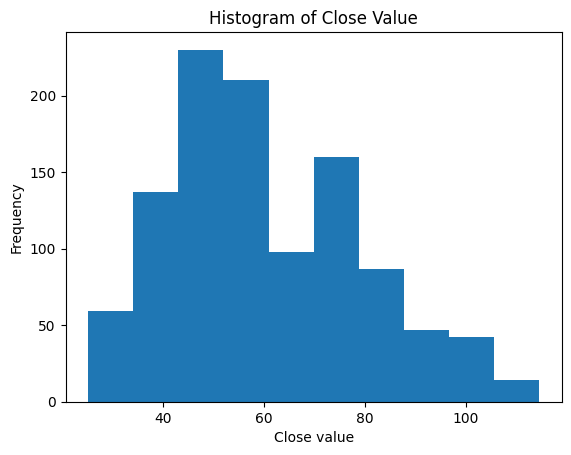

In [6]:
#  Draw a histogram
plt.hist(df['Close'])

# Set label and title
plt.xlabel('Close value')
plt.ylabel('Frequency')
plt.title('Histogram of Close Value')

# Display histogram
plt.show()

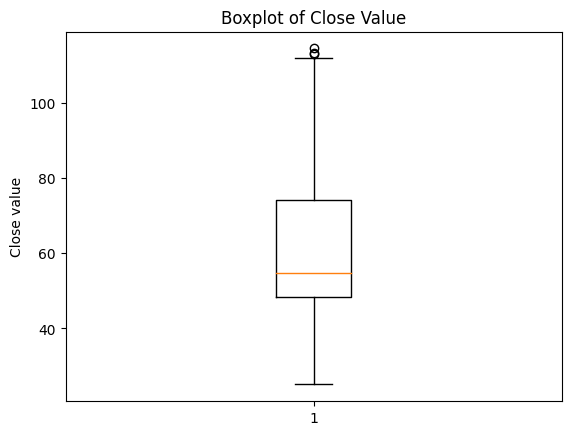

In [7]:
# Draw a boxplot
plt.boxplot(df.Close)

# Set label and title
plt.title("Boxplot of Close Value")
plt.ylabel("Close value")

# Hiển thị biểu đồ
plt.show()

In [8]:
# Select column 'Close'
df_Close = df[['Close']]

In [9]:
# Split the data into train, test, and validate sets in a ratio of 6:2:2
train_size = int(0.6 * len(df_Close))
test_size = int(0.2 * len(df_Close))
val_size = len(df_Close) - train_size - test_size

train_data = df_Close[: train_size]
test_data = df_Close[train_size : train_size + test_size]
val_data = df_Close[train_size + test_size :]

In [10]:
# Training on the train set and testing on the test set
history = train_data.Close.tolist()
y_pred = []

for i in test_data.Close:
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_pred.append(prediction[0])
  history.append(i)

In [11]:
# Using the train set and the test set for training, then predicting on the validation set
y_pred_val = []

for i in val_data.Close:
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_pred_val.append(prediction[0])
  history.append(i)

In [12]:
# Evaluate the accuracy of test
test_mae = mean_absolute_error(test_data, y_pred)
test_mape = mean_absolute_percentage_error(test_data, y_pred)
test_mse = mean_squared_error(test_data, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(test_data, y_pred)

print(f"MAE on Test set: ", test_mae)
print(f"MAPE on Test set: ", test_mape)
print(f"MSE on Test set: ", test_mse)
print(f"RMSE on Test set: ", test_rmse)
print(f"MSLE on Test set: ", test_msle)

MAE on Test set:  1.58580860064933
MAPE on Test set:  0.0191895713005013
MSE on Test set:  4.913596038613975
RMSE on Test set:  2.2166632668526756
MSLE on Test set:  0.0006267803631487429


In [13]:
# Evaluate the accuracy of validate
val_mae = mean_absolute_error(val_data, y_pred_val)
val_mape = mean_absolute_percentage_error(val_data, y_pred_val)
val_mse = mean_squared_error(val_data, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_msle = mean_squared_log_error(val_data, y_pred_val)

print(f"MAE on Validate set: ",val_mae)
print(f"MAPE on Validate set: ", val_mape)
print(f"MSE on Validate set: ", val_mse)
print(f"RMSE on Validate set: ", val_rmse)
print(f"MSLE on Validate set: ", val_msle)

MAE on Validate set:  1.7260240524556452
MAPE on Validate set:  0.021365898784000584
MSE on Validate set:  5.178936845981056
RMSE on Validate set:  2.2757277618337954
MSLE on Validate set:  0.000764919474257376


In [14]:
# The process of creating index predict next 30 days

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Predict the closing prices for the next 30 days
y_next_30_days = []

for i in range(30):
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_next_30_days.append(prediction[0])
  history.append(prediction[0])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523, 71.18201136955523]


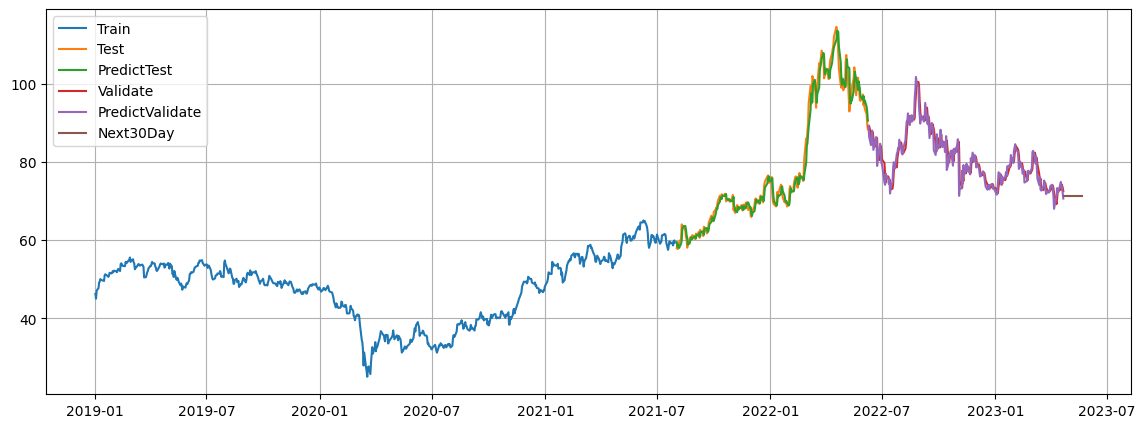

In [15]:
# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[:train_size], train_data)
plt.plot(df.index[train_size : train_size + test_size], test_data)
plt.plot(df.index[train_size : train_size + test_size], y_pred)
plt.plot(df.index[train_size + test_size :], y_pred_val)
plt.plot(df.index[train_size + test_size :], val_data)
plt.plot(index_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'PredictTest', 'Validate', 'PredictValidate', 'Next30Day'])
plt.grid()
plt.savefig('IS403_ETS_NTR.png')
plt.show()